In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns


In [2]:
#%% Import student data

df = pd.read_csv(r'C:\Users\b414410.STANLIB\Documents\Data science\Data_Files\StudentsPerformance.csv')

#%% Create a new column with the mean of the subject score
df['Average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1).round()

#%%
# create another column displaying whether a student passed or failed. 
# Pass mark = 50%

df['Result'] = np.where(df['Average_score'] >= 50, 'Pass', 'Fail')

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average_score,Result
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0,Pass
1,female,group C,some college,standard,completed,69,90,88,82.0,Pass
2,female,group B,master's degree,standard,none,90,95,93,93.0,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0,Fail
4,male,group C,some college,standard,none,76,78,75,76.0,Pass


# High Level Overview

### Below I looked at the individual features at a high level. The most important aspect as this point is the spread of data accros each feature which may give us an indication of bias and/or influence.

<AxesSubplot:xlabel='gender', ylabel='Count'>

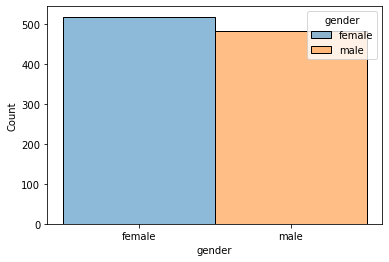

In [11]:
sns.histplot(df, x='gender', hue='gender')


<AxesSubplot:xlabel='race/ethnicity', ylabel='Count'>

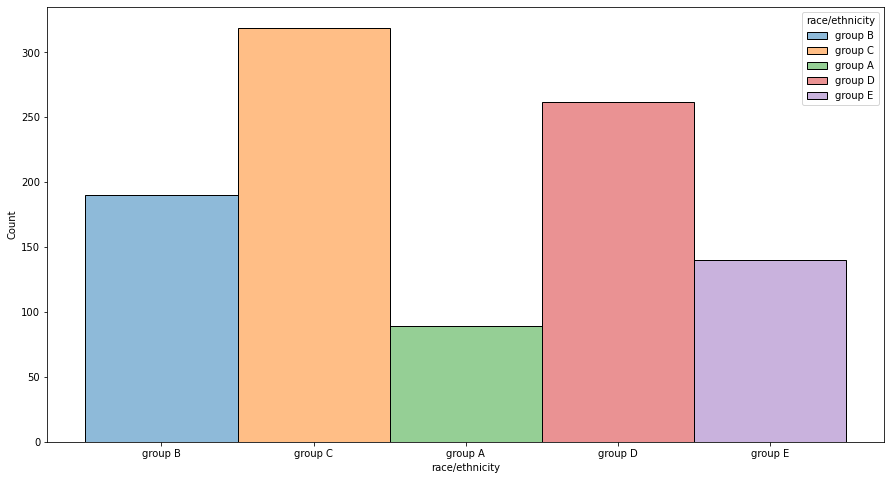

In [247]:
sns.histplot(df, x='race/ethnicity', hue='race/ethnicity')

<AxesSubplot:xlabel='test preparation course', ylabel='Count'>

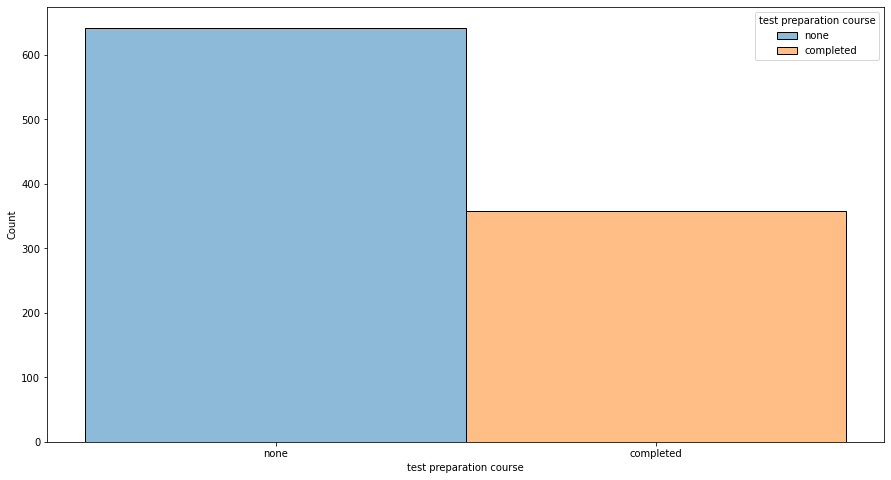

In [248]:
sns.histplot(df, x='test preparation course', hue='test preparation course')

<AxesSubplot:xlabel='lunch', ylabel='Count'>

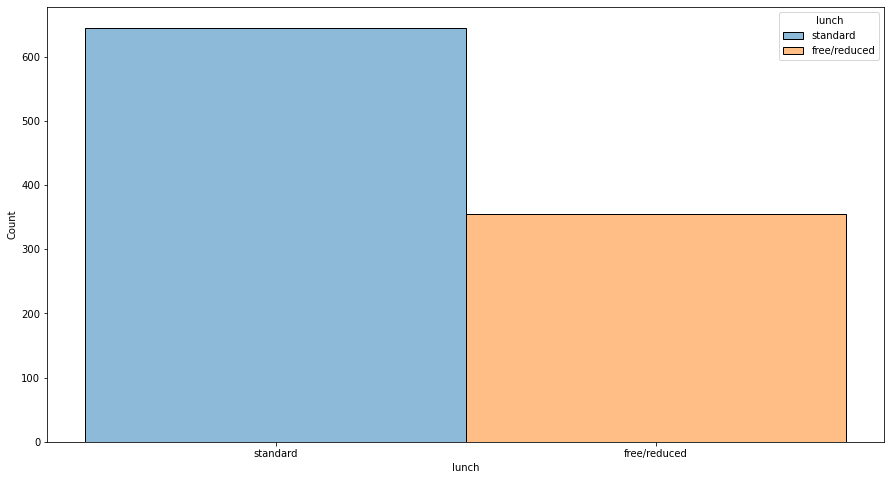

In [249]:
sns.histplot(df, x='lunch', hue='lunch')

<AxesSubplot:xlabel='parental level of education', ylabel='Count'>

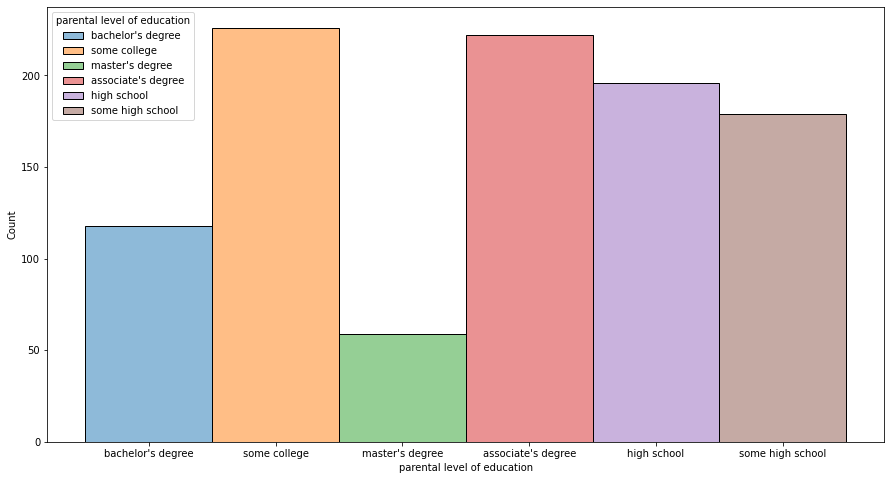

In [250]:
sns.histplot(df, x='parental level of education', hue='parental level of education')

<AxesSubplot:xlabel='Result', ylabel='Count'>

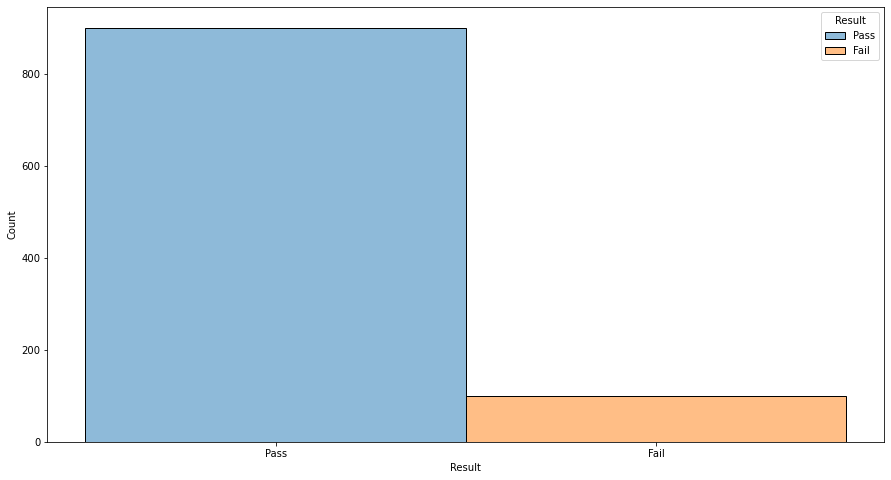

In [251]:
sns.histplot(df, x='Result', hue='Result')

<AxesSubplot:xlabel='Average_score', ylabel='Count'>

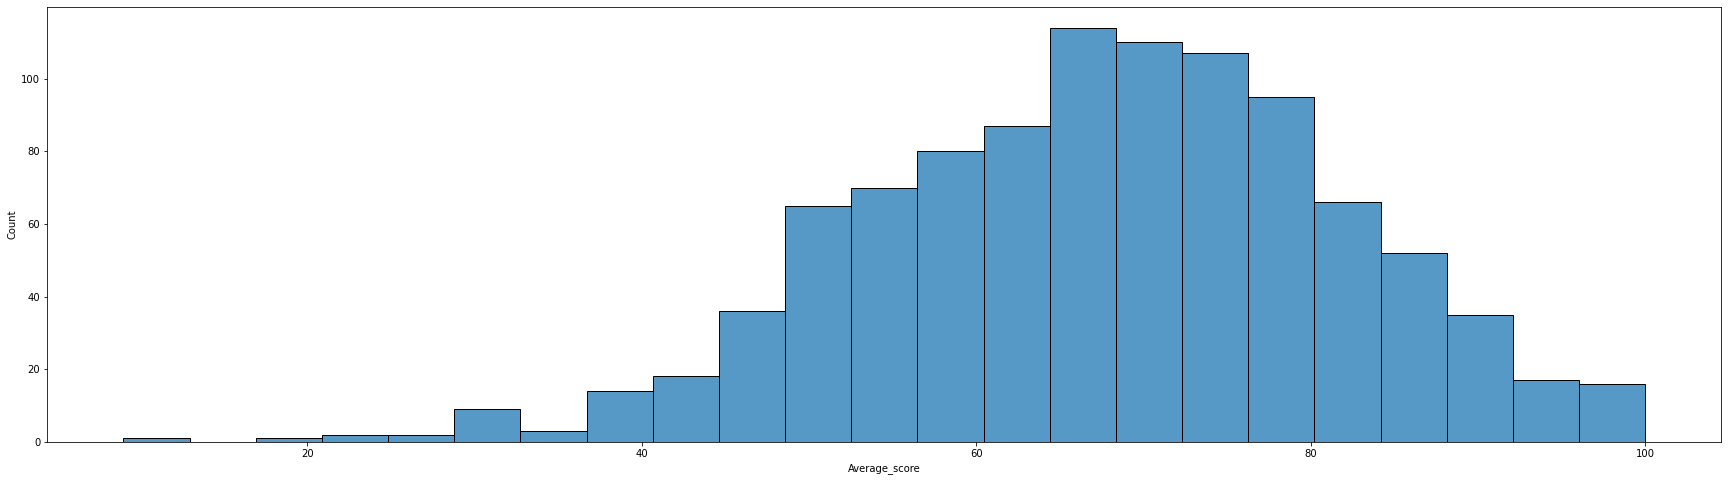

In [201]:
sns.histplot(df.Average_score)

In [254]:
df.groupby('Result').agg(['count', 'mean'])

math score            reading score  ... writing score Average_score           
            count       mean         count  ...          mean         count       mean
Result                                      ...                                       
Fail          100  41.230000           100  ...     40.920000           100  41.820000
Pass          900  68.851111           900  ...     71.068889           900  70.644444

[2 rows x 8 columns]

# Gender-Based Analysis

In [53]:
df.groupby('gender').mean()

,math score,reading score,writing score,Average_score
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.819502


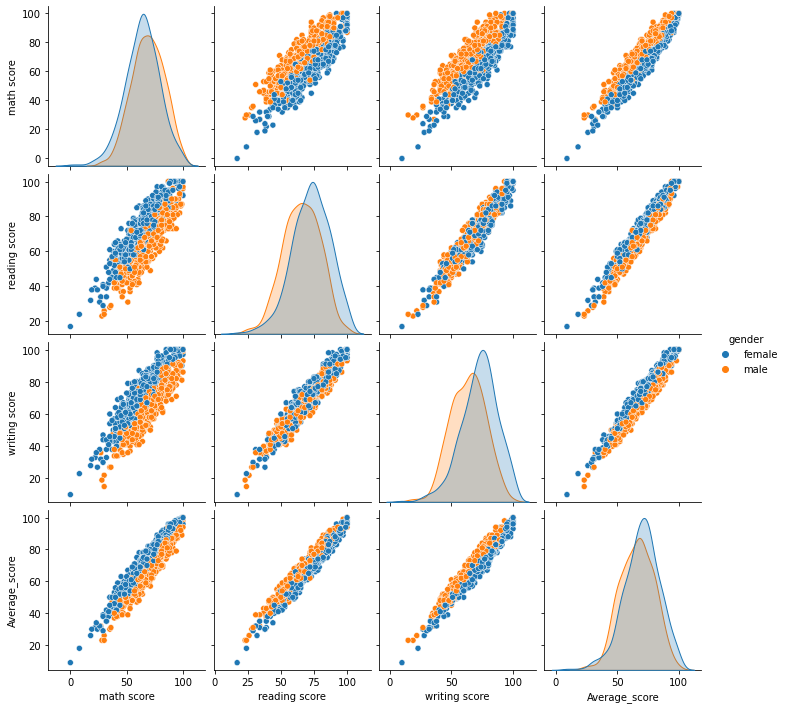

In [272]:
sns.pairplot(df, hue='species')

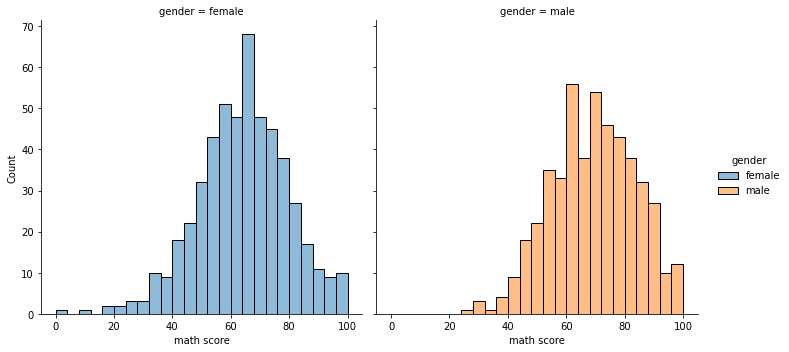

In [231]:
sns.displot(data=df, x="math score", hue="gender", col="gender")

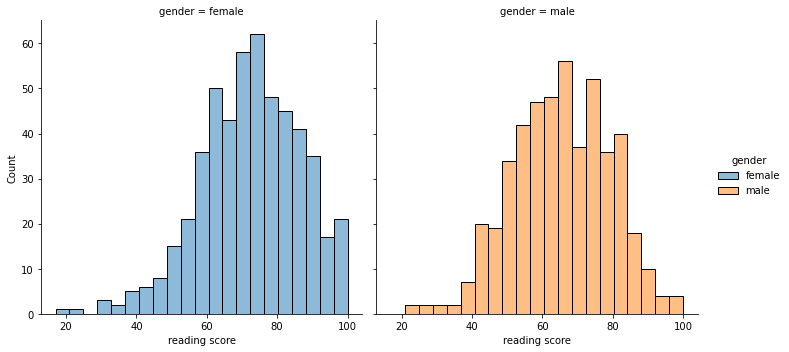

In [266]:
sns.displot(data=df, x="reading score", hue="gender", col="gender")

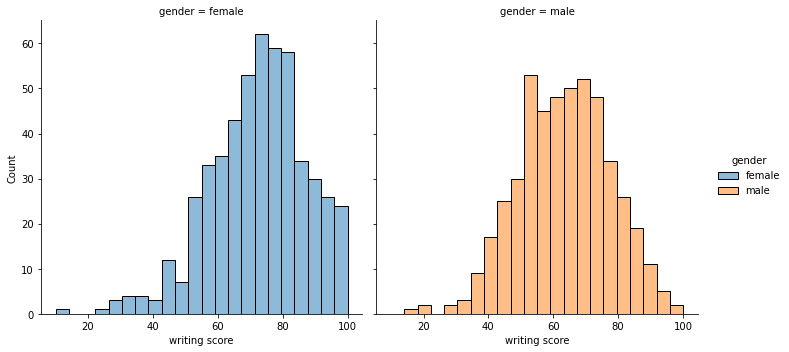

In [267]:
sns.displot(data=df, x="writing score", hue="gender", col="gender")

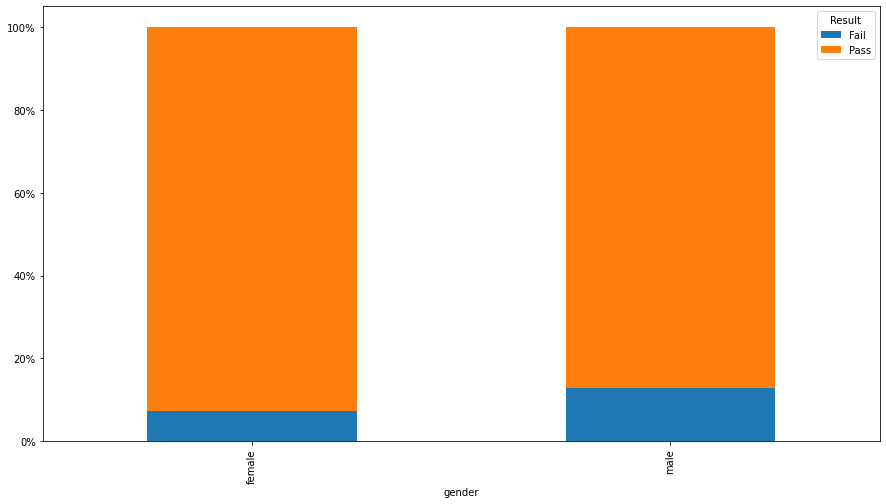

In [137]:
df.groupby(['gender', 'Result']).size().groupby(level=0).apply(
          lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

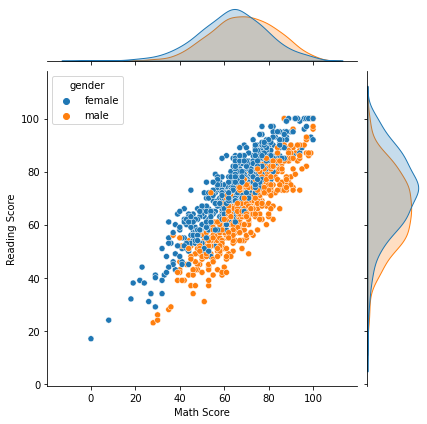

In [269]:
g = sns.jointplot(data=df, x="math score", y="reading score", hue='gender')
g.set_axis_labels("Math Score", "Reading Score")

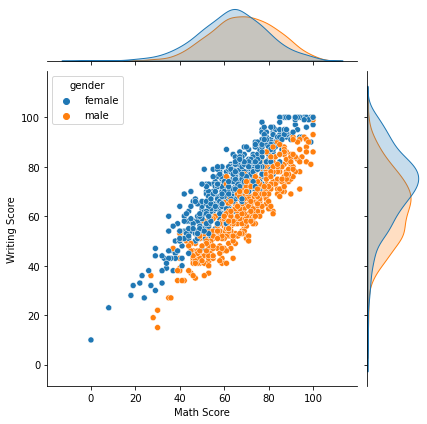

In [270]:
g = sns.jointplot(data=df, x="math score", y="writing score", hue="gender")
g.set_axis_labels("Math Score", "Writing Score")

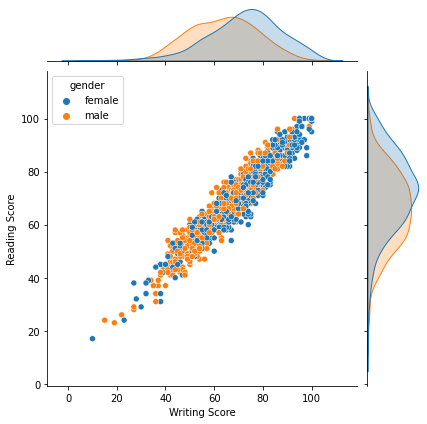

In [271]:
g = sns.jointplot(data=df, x="writing score", y="reading score", hue="gender")
g.set_axis_labels("Writing Score", "Reading Score")

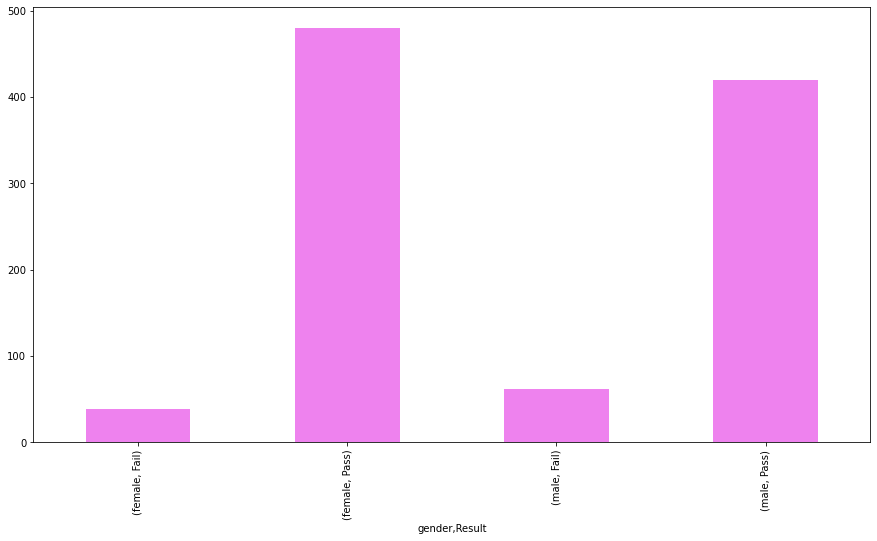

In [171]:
df.groupby(['gender', 'Result'])['gender'].count().plot(kind='bar', color='violet')
                                                
plt.rcParams["figure.figsize"] = (15,8)


<AxesSubplot:xlabel='gender,Result'>

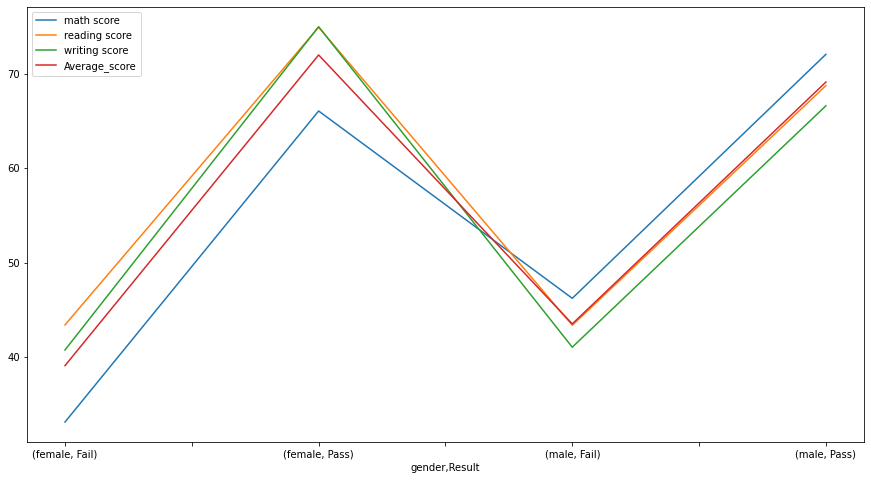

In [174]:
df.groupby(['gender', 'Result']).mean().plot(kind='line')

<AxesSubplot:xlabel='Average_score', ylabel='Count'>

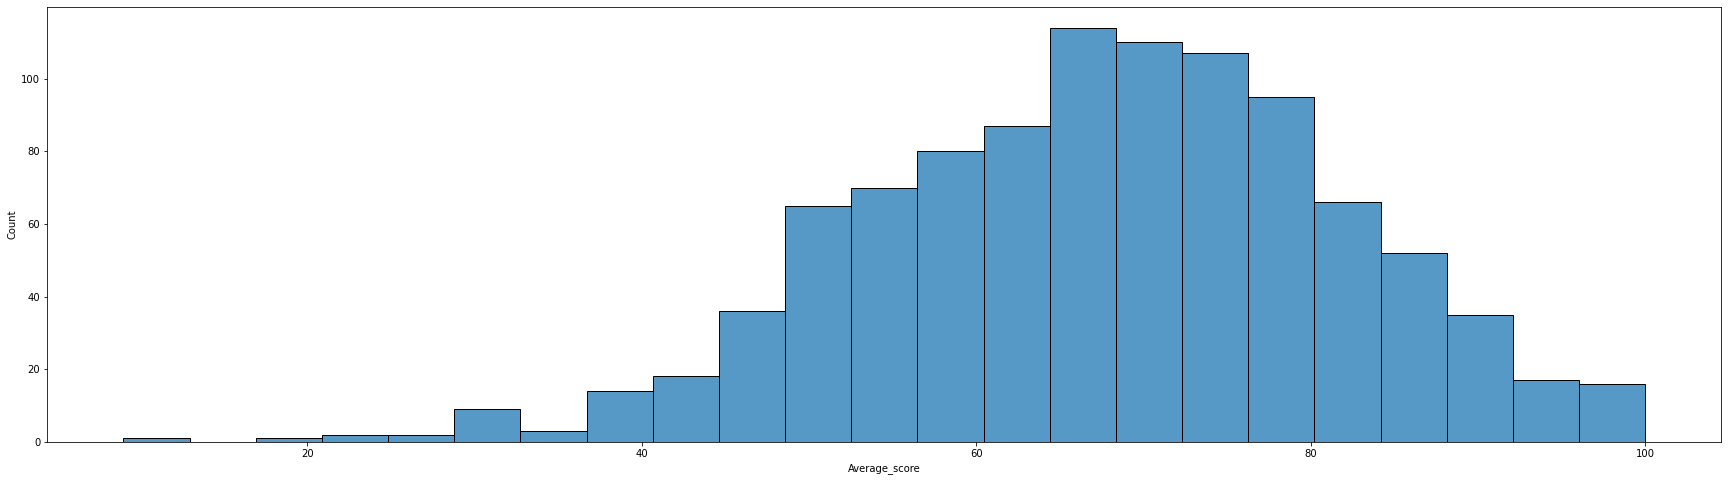

In [200]:
sns.histplot(df.Average_score)

In [178]:
df.groupby(['gender', 'parental level of education'])['Average_score'].mean()

gender  parental level of education
female  associate's degree             71.129310
        bachelor's degree              74.682540
        high school                    64.765957
        master's degree                73.638889
        some college                   70.974576
        some high school               65.571429
male    associate's degree             67.839623
        bachelor's degree              68.818182
        high school                    61.607843
        master's degree                73.478261
        some college                   65.685185
        some high school               64.556818
Name: Average_score, dtype: float64

In [55]:
df.groupby(['gender', 'parental level of education'])['math score', 'reading score', 'writing score'].mean()

C:\Users\B41441~1.STA\AppData\Local\Temp/ipykernel_23532/1391770763.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['gender', 'parental level of education'])['math score', 'reading score', 'writing score'].mean()


math score  reading score  writing score
gender parental level of education                                          
female associate's degree            65.250000      74.120690      74.000000
       bachelor's degree             68.349206      77.285714      78.380952
       high school                   59.351064      68.202128      66.691489
       master's degree               66.500000      76.805556      77.638889
       some college                  65.406780      73.550847      74.050847
       some high school              59.296703      69.109890      68.285714
male   associate's degree            70.764151      67.433962      65.405660
       bachelor's degree             70.581818      68.090909      67.654545
       high school                   64.705882      61.480392      58.539216
       master's degree               74.826087      73.130435      72.608696
       some college                  69.009259      64.990741      63.148148
       some high school              67.840909      64.693182      61.375000

# Raced-Based Analysis

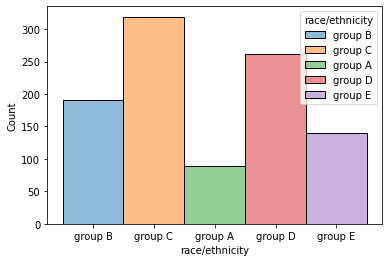

In [61]:
sns.histplot(df, x='race/ethnicity', hue='race/ethnicity')


In [57]:
df.groupby('race/ethnicity').mean()

,math score,reading score,writing score,Average_score
race/ethnicity,,,,
group A,61.629213,64.674157,62.674157,62.955056
group B,63.452632,67.352632,65.600000,65.484211
group C,64.463950,69.103448,67.827586,67.122257
group D,67.362595,70.030534,70.145038,69.179389
group E,73.821429,73.028571,71.407143,72.714286


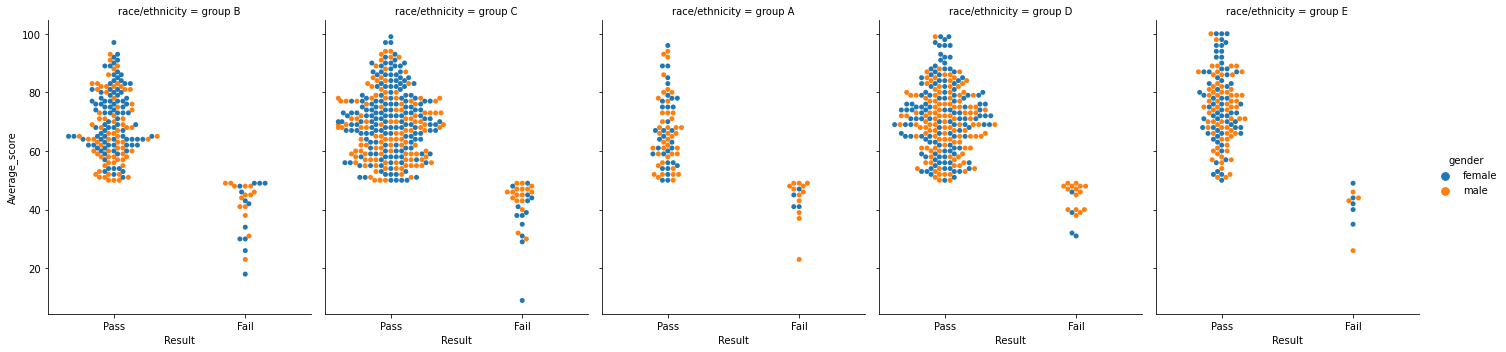

In [58]:
sns.catplot(x="Result", y="Average_score", hue="gender",
            col="race/ethnicity", aspect=.8,
            kind="swarm", data=df)

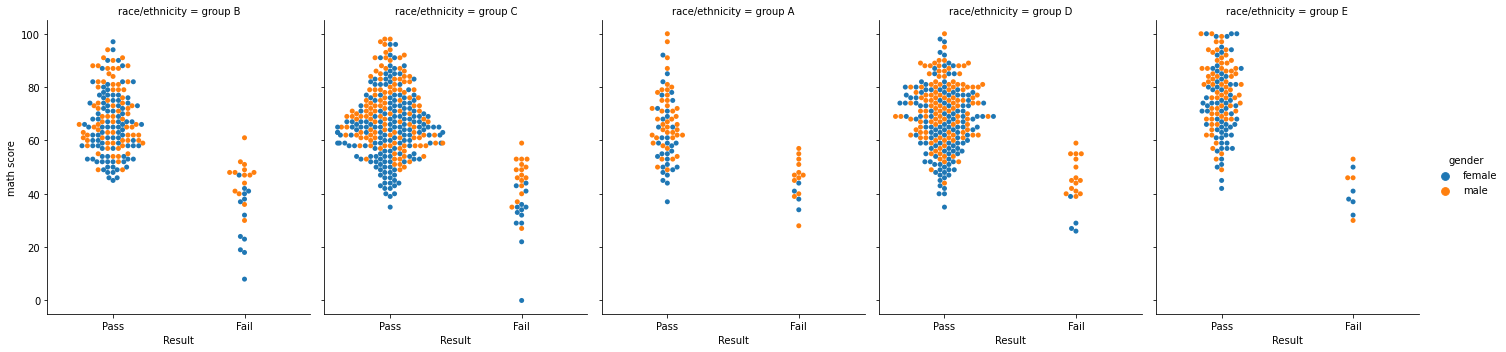

In [62]:
sns.catplot(x="Result", y="math score", hue="gender",
            col="race/ethnicity", aspect=.8,
            kind="swarm", data=df)

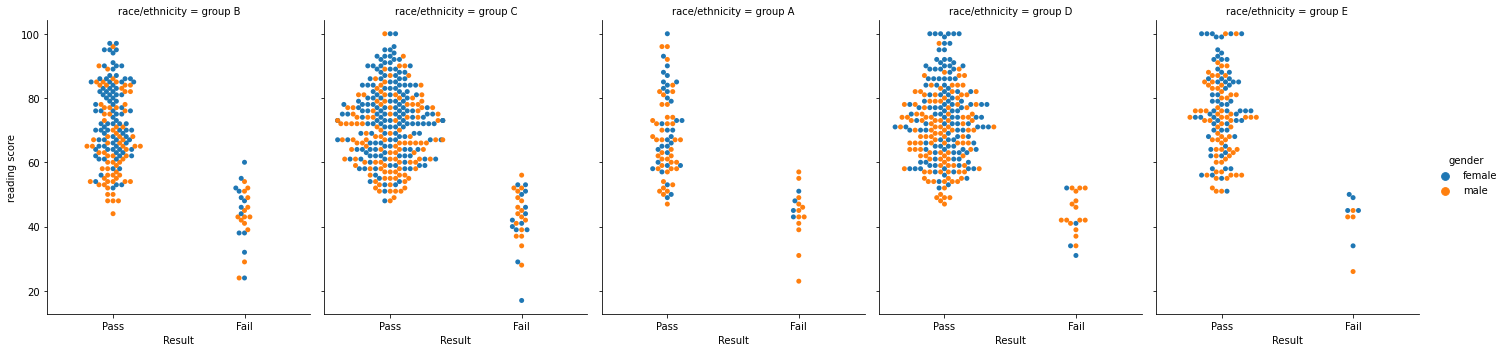

In [65]:
sns.catplot(x="Result", y="reading score", hue="gender",
            col="race/ethnicity", aspect=.8,
            kind="swarm", data=df)

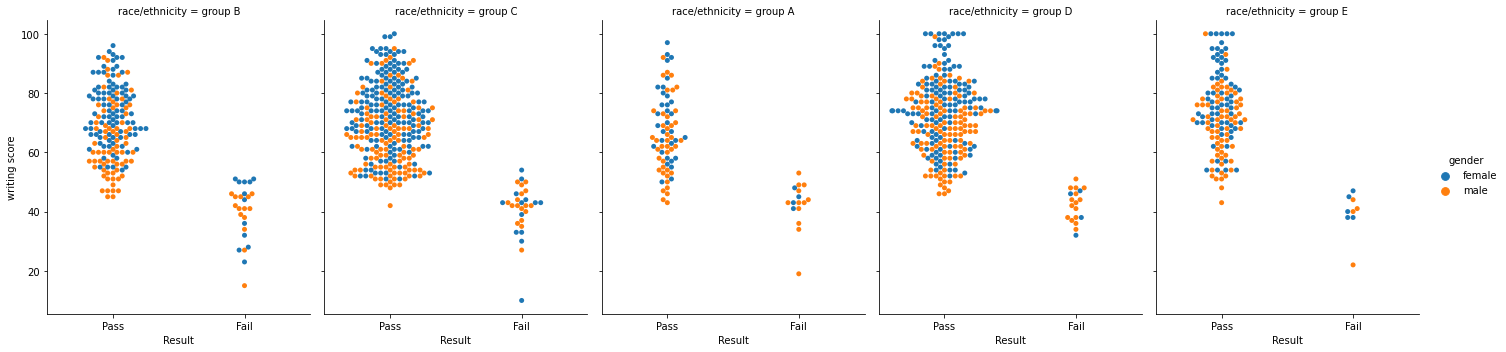

In [64]:
sns.catplot(x="Result", y="writing score", hue="gender",
            col="race/ethnicity", aspect=.8,
            kind="swarm", data=df)

In [60]:
df.groupby(['race/ethnicity', 'Result']).mean()

math score  reading score  writing score  Average_score
race/ethnicity Result                                                         
group A        Fail     44.562500      44.125000      42.375000      43.562500
               Pass     65.369863      69.178082      67.123288      67.205479
group B        Fail     38.884615      43.769231      39.730769      40.769231
               Pass     67.347561      71.091463      69.701220      69.402439
group C        Fail     39.866667      42.933333      40.833333      41.200000
               Pass     67.017301      71.820069      70.629758      69.813149
group D        Fail     43.684211      43.421053      42.157895      43.157895
               Pass     69.213992      72.111111      72.333333      71.213992
group E        Fail     41.444444      42.222222      39.444444      41.000000
               Pass     76.045802      75.145038      73.603053      74.893130

In [3]:
df.groupby(['parental level of education', 'race/ethnicity'])['Average_score'].count()

parental level of education  race/ethnicity
associate's degree           group A           14
                             group B           41
                             group C           78
                             group D           50
                             group E           39
bachelor's degree            group A           12
                             group B           20
                             group C           40
                             group D           28
                             group E           18
high school                  group A           18
                             group B           48
                             group C           64
                             group D           44
                             group E           22
master's degree              group A            3
                             group B            6
                             group C           19
                             group D           23
      

In [62]:
df.groupby(['race/ethnicity', 'parental level of education'])['math score', 'reading score', 'writing score'].mean()

C:\Users\B41441~1.STA\AppData\Local\Temp/ipykernel_23532/4135938100.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['race/ethnicity', 'parental level of education'])['math score', 'reading score', 'writing score'].mean()


math score  ...  writing score
race/ethnicity parental level of education              ...               
group A        associate's degree            61.000000  ...      63.571429
               bachelor's degree             67.166667  ...      68.333333
               high school                   60.444444  ...      60.500000
               master's degree               57.666667  ...      67.666667
               some college                  63.888889  ...      65.000000
               some high school              58.916667  ...      58.583333
group B        associate's degree            66.097561  ...      68.243902
               bachelor's degree             69.300000  ...      71.650000
               high school                   59.791667  ...      61.250000
               master's degree               67.166667  ...      77.166667
               some college                  63.189189  ...      64.189189
               some high school              61.815789  ...      64.605263
group C        associate's degree            66.730769  ...      70.269231
               bachelor's degree             68.150000  ...      75.900000
               high school                   60.906250  ...      61.656250
               master's degree               67.052632  ...      69.526316
               some college                  65.130435  ...      68.869565
               some high school              60.551020  ...      63.285714
group D        associate's degree            67.600000  ...      69.860000
               bachelor's degree             67.571429  ...      71.892857
               high school                   62.863636  ...      63.159091
               master's degree               72.521739  ...      79.739130
               some college                  68.731343  ...      71.701493
               some high school              66.760000  ...      69.100000
group E        associate's degree            74.897436  ...      73.205128
               bachelor's degree             76.555556  ...      75.388889
               high school                   70.772727  ...      67.545455
               master's degree               74.625000  ...      80.500000
               some college                  73.828571  ...      70.200000
               some high school              72.111111  ...      66.555556

[30 rows x 3 columns]

In [6]:
df.groupby(['race/ethnicity', 'gender', 'parental level of education'])['math score', 'reading score', 'writing score', 'Average_score'].mean()

C:\Users\B41441~1.STA\AppData\Local\Temp/ipykernel_21932/3888915068.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['race/ethnicity', 'gender', 'parental level of education'])['math score', 'reading score', 'writing score', 'Average_score'].mean()


math score  ...  Average_score
race/ethnicity gender parental level of education              ...               
group A        female associate's degree            57.500000  ...      65.333333
                      bachelor's degree             51.666667  ...      57.666667
                      high school                   60.428571  ...      66.142857
                      master's degree               50.000000  ...      58.500000
                      some college                  62.125000  ...      67.625000
                      some high school              58.700000  ...      65.700000
               male   associate's degree            63.625000  ...      62.750000
                      bachelor's degree             72.333333  ...      71.333333
                      high school                   60.454545  ...      58.272727
                      master's degree               73.000000  ...      73.000000
                      some college                  65.300000  ...      62.400000
                      some high school              59.071429  ...      55.571429
group B        female associate's degree            62.652174  ...      68.869565
                      bachelor's degree             71.363636  ...      77.363636
                      high school                   59.000000  ...      64.928571
                      master's degree               70.800000  ...      79.600000
                      some college                  61.133333  ...      66.533333
                      some high school              56.227273  ...      62.545455
               male   associate's degree            70.500000  ...      66.833333
                      bachelor's degree             66.777778  ...      64.222222
                      high school                   60.900000  ...      56.700000
                      master's degree               49.000000  ...      51.000000
                      some college                  64.590909  ...      62.954545
                      some high school              69.500000  ...      66.625000
group C        female associate's degree            64.777778  ...      70.800000
                      bachelor's degree             65.807692  ...      73.923077
                      high school                   55.633333  ...      61.866667
                      master's degree               62.000000  ...      69.714286
                      some college                  63.613636  ...      70.045455
                      some high school              58.500000  ...      64.714286
               male   associate's degree            69.393939  ...      67.484848
                      bachelor's degree             72.500000  ...      71.857143
                      high school                   65.558824  ...      62.735294
                      master's degree               70.000000  ...      68.583333
                      some college                  67.800000  ...      63.800000
                      some high school              63.285714  ...      61.047619
group D        female associate's degree            63.375000  ...      69.916667
                      bachelor's degree             69.769231  ...      76.076923
                      high school                   61.470588  ...      66.470588
                      master's degree               66.600000  ...      73.400000
                      some college                  68.114286  ...      73.885714
                      some high school              62.440000  ...      69.280000
               male   associate's degree            71.500000  ...      68.807692
                      bachelor's degree             65.666667  ...      64.533333
                      high school                   63.740741  ...      61.740741
                      master's degree               83.625000  ...      82.125000
                      some college                  69.406250  ...      66.625000
                      some high s